In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Adapted from https://github.com/amirrezaeian/Individual-household-electric-power-consumption-Data-Set-¶

### Load Data
- date: date in format dd/mm/yyyy

- time: time in format hh:mm:ss

- global_active_power: household global minute-averaged active power (in kilowatt)

- global_reactive_power: household global minute-averaged reactive power (in kilowatt)

- voltage: minute-averaged voltage (in volt)

- global_intensity: household global minute-averaged current intensity (in ampere)

- sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

- sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

- sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [9]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
# data (as pandas dataframes)
raw_data_df = individual_household_electric_power_consumption.data.features
# metadata
print(individual_household_electric_power_consumption.metadata)
# variable information
print(individual_household_electric_power_consumption.variables)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

/Users/edkwang/.pyenv/versions/3.12.2/envs/rsch/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


### Explore Data

In [11]:
data_df = raw_data_df.copy()
data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'], format='%d/%m/%Y %H:%M:%S')
data_df = data_df.drop(columns=['Date', 'Time'])
data_df = data_df.set_index('DateTime')
data_df = data_df.apply(pd.to_numeric, errors='coerce')
data_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
print(data_df.info())
print(data_df.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None
(2075259, 7)


In [13]:
data_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [14]:
data_df = data_df.fillna(data_df.mean())
data_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

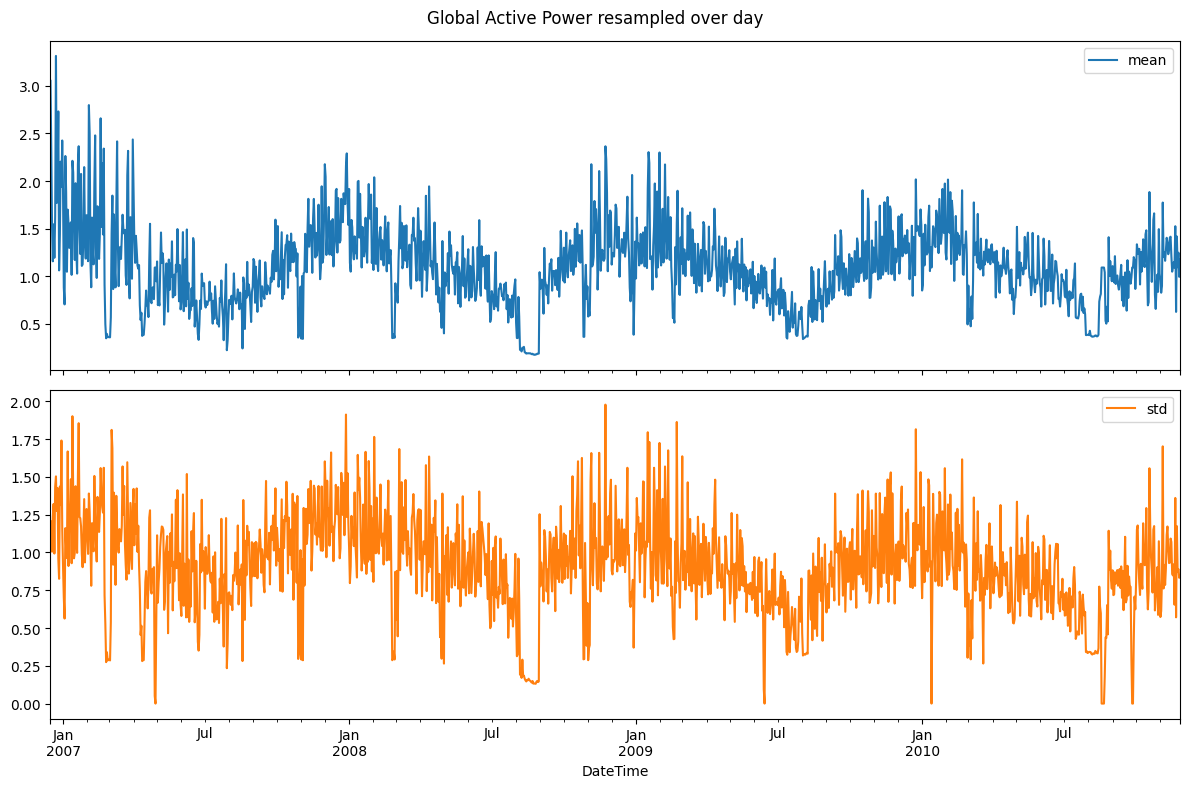

In [15]:
data_df['Global_active_power'].resample('D').agg(['mean','std']).plot(subplots=True, figsize=(12, 8), title='Global Active Power resampled over day')
plt.tight_layout()
plt.show()

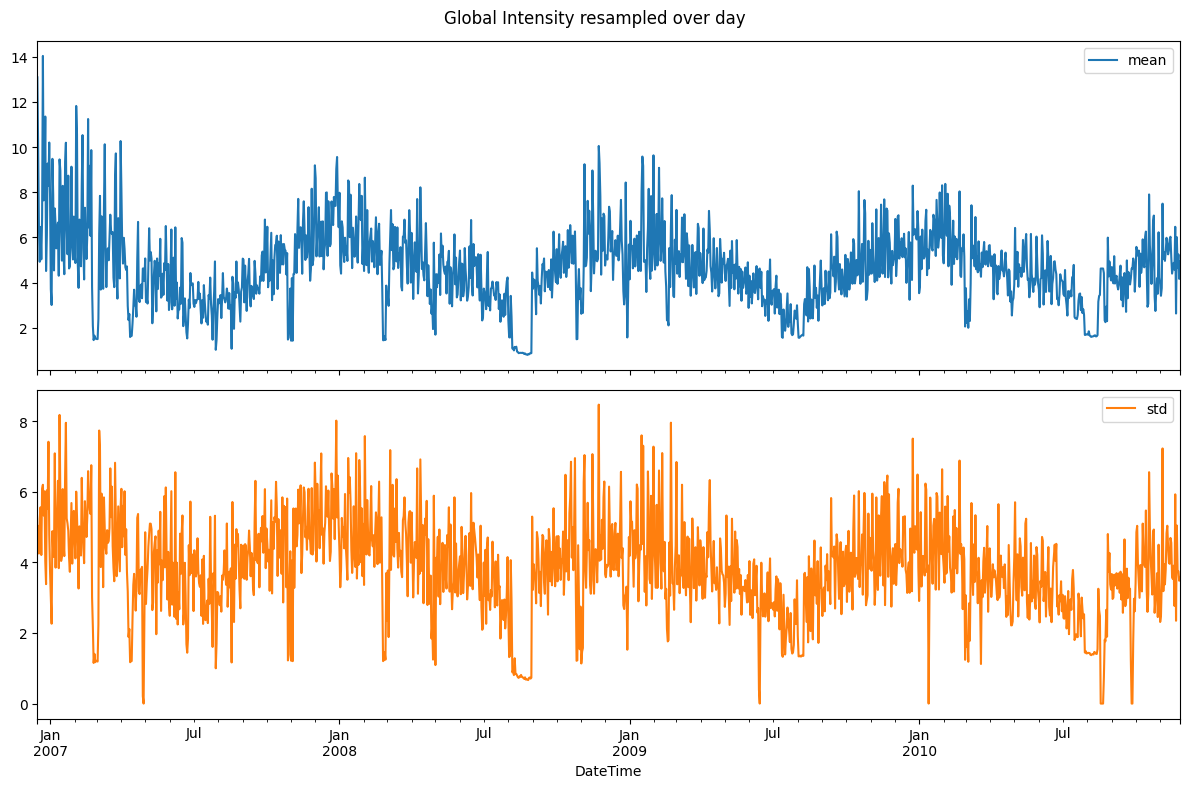

In [16]:
data_df['Global_intensity'].resample('D').agg(['mean', 'std']).plot(subplots=True, figsize=(12, 8), title='Global Intensity resampled over day')
plt.tight_layout()
plt.show()

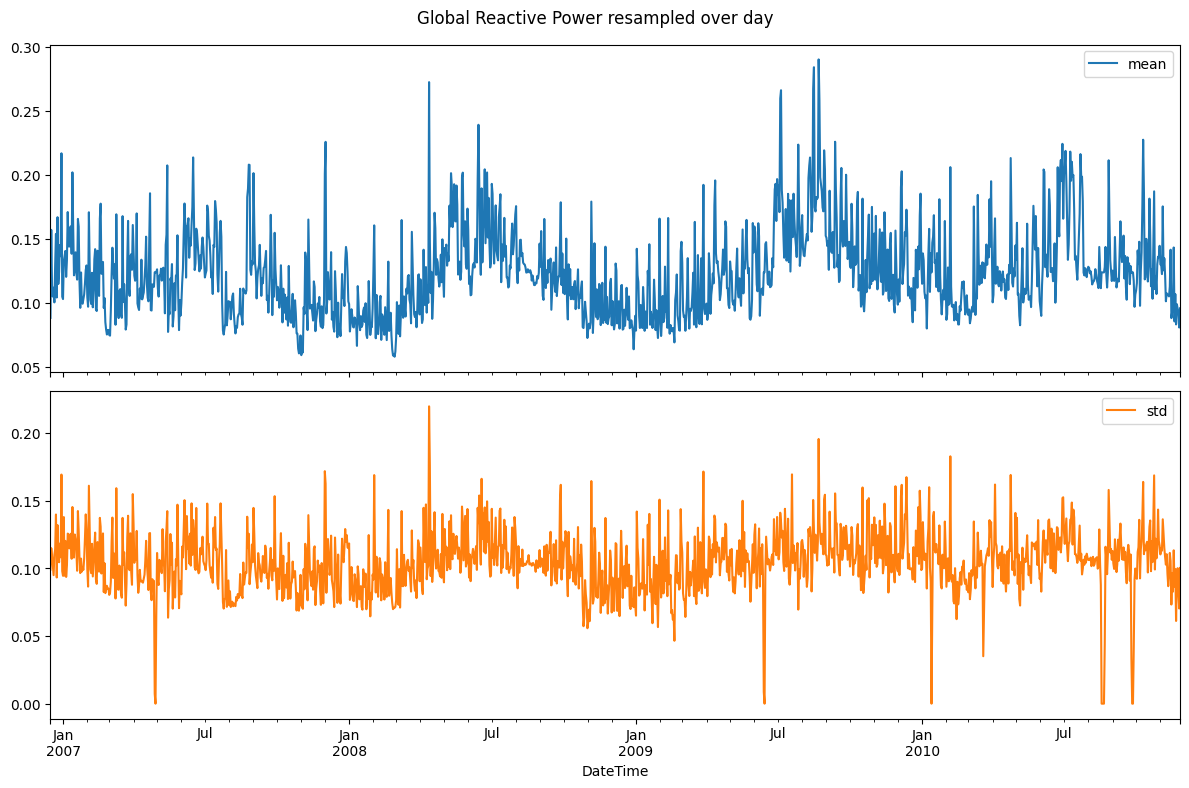

In [17]:
data_df['Global_reactive_power'].resample('D').agg(['mean', 'std']).plot(subplots=True, figsize=(12, 8), title='Global Reactive Power resampled over day')
plt.tight_layout()
plt.show()

/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_3914/2296706406.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df['Global_active_power'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Global Active Power monthly average')


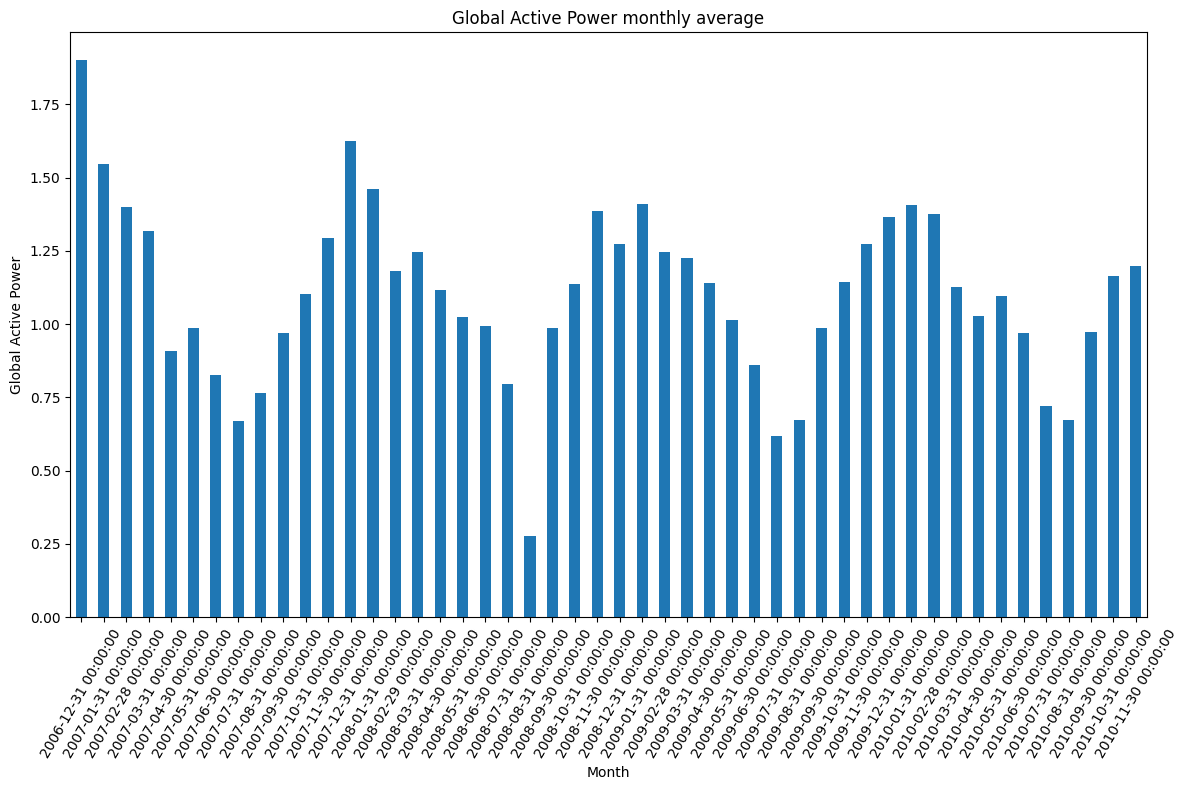

In [18]:
data_df['Global_active_power'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Global Active Power monthly average')
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.tight_layout()
plt.show()

/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_3914/2667200780.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data_df['Global_active_power'].resample('Q').mean().plot(kind='bar', figsize=(12, 8), title='Global Active Power quarterly average')


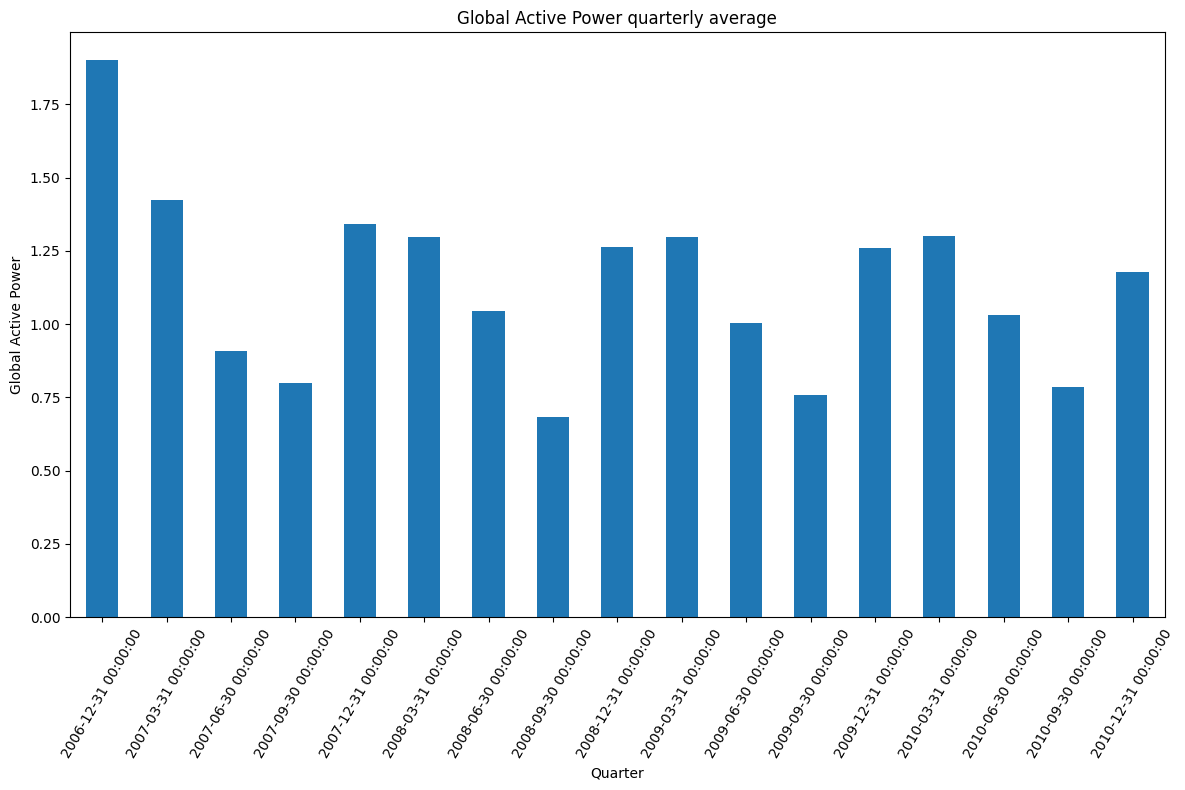

In [19]:
data_df['Global_active_power'].resample('Q').mean().plot(kind='bar', figsize=(12, 8), title='Global Active Power quarterly average')
plt.xlabel('Quarter')
plt.xticks(rotation=60)
plt.ylabel('Global Active Power')
plt.tight_layout()
plt.show()

/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_3914/3741591709.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df['Voltage'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Voltage monthly average')


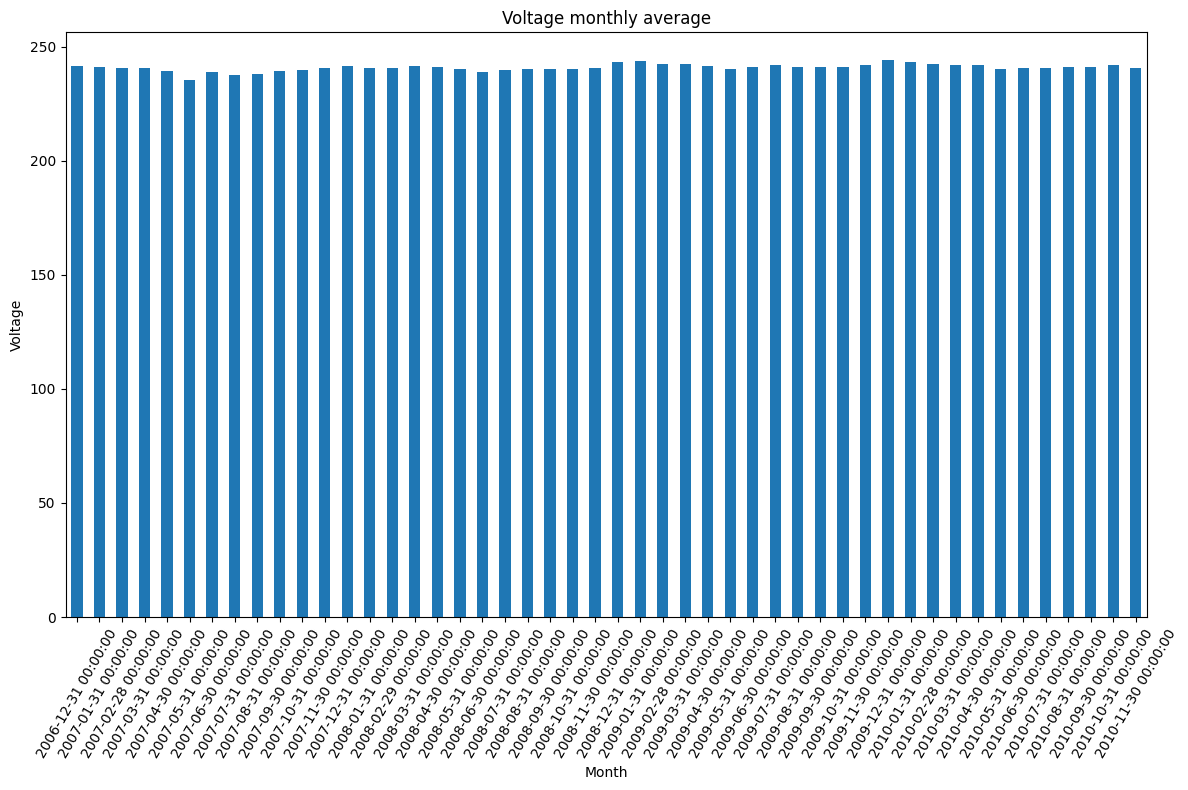

In [20]:
data_df['Voltage'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Voltage monthly average')
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.tight_layout()
plt.show()


/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_3914/2813803006.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df['Sub_metering_1'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Sub_metering_1 monthly average')


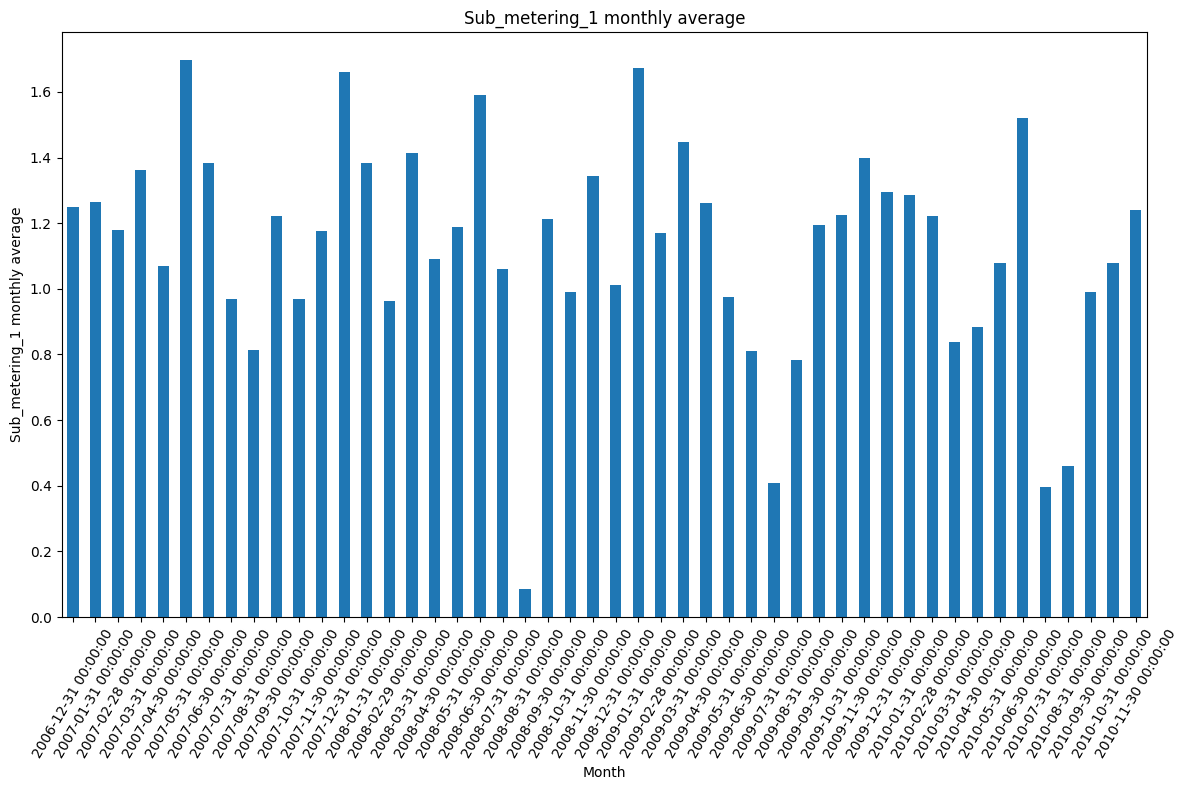

In [21]:
data_df['Sub_metering_1'].resample('M').mean().plot(kind='bar', figsize=(12, 8), title='Sub_metering_1 monthly average')
plt.xlabel('Month')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1 monthly average')
plt.tight_layout()
plt.show()


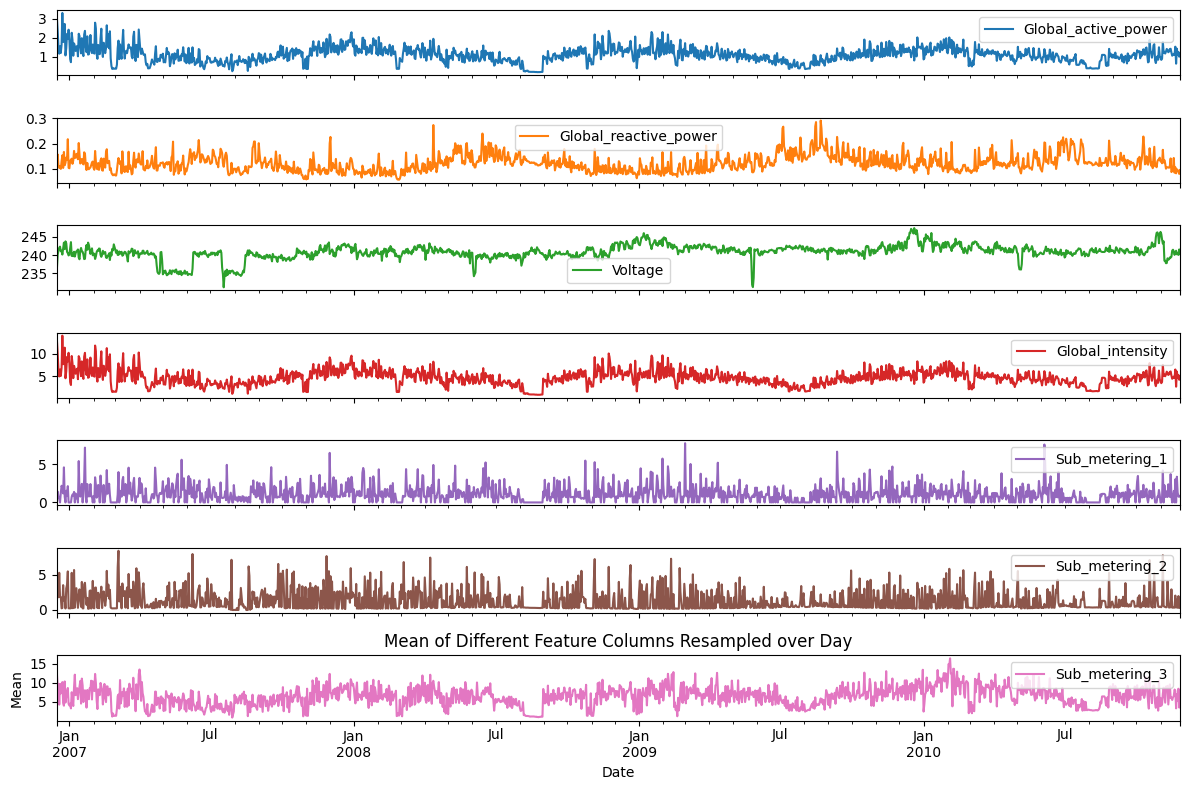

In [22]:
data_df.resample('D').mean().plot(subplots=True, figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Mean')
plt.title('Mean of Different Feature Columns Resampled over Day')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


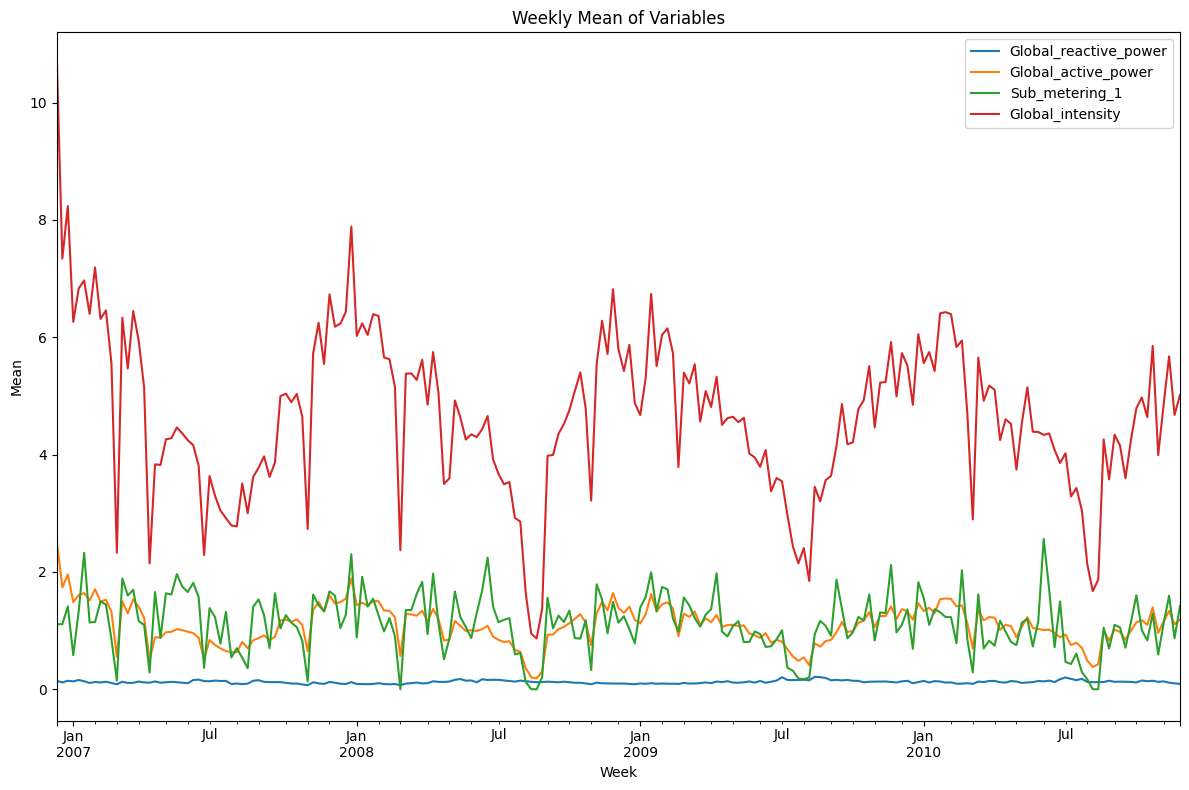

In [25]:
columns = ['Global_reactive_power', 'Global_active_power', 'Sub_metering_1', 'Global_intensity']
data_df_weekly_mean = data_df.resample('W').mean()
data_df_weekly_mean[columns].plot(figsize=(12, 8))
plt.xlabel('Week')
plt.ylabel('Mean')
plt.title('Weekly Mean of Variables')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_3914/2482038173.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_df_monthly_mean = data_df.resample('M').mean()


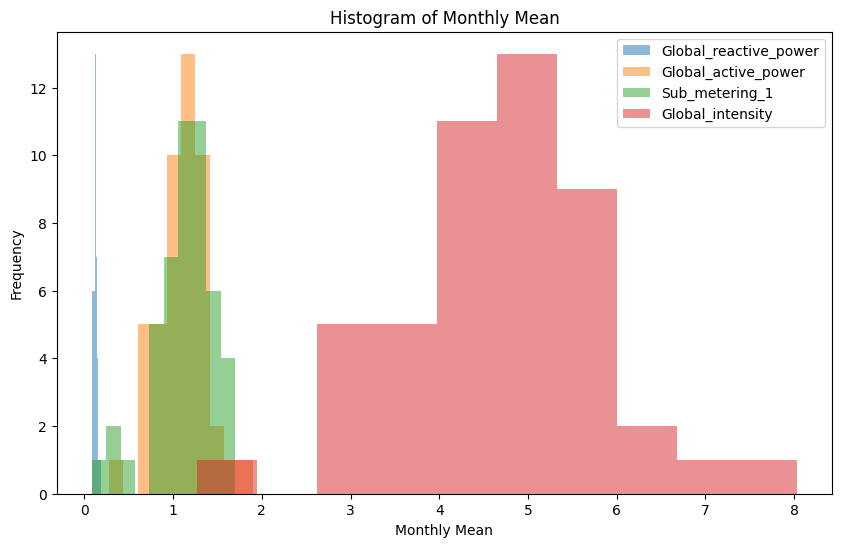

In [26]:
data_df_monthly_mean = data_df.resample('M').mean()
# Plot the histogram
plt.figure(figsize=(10, 6))
for column in columns:
    plt.hist(data_df_monthly_mean[column], bins=10, alpha=0.5, label=column)

plt.xlabel('Monthly Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Mean')
plt.legend()
plt.show()


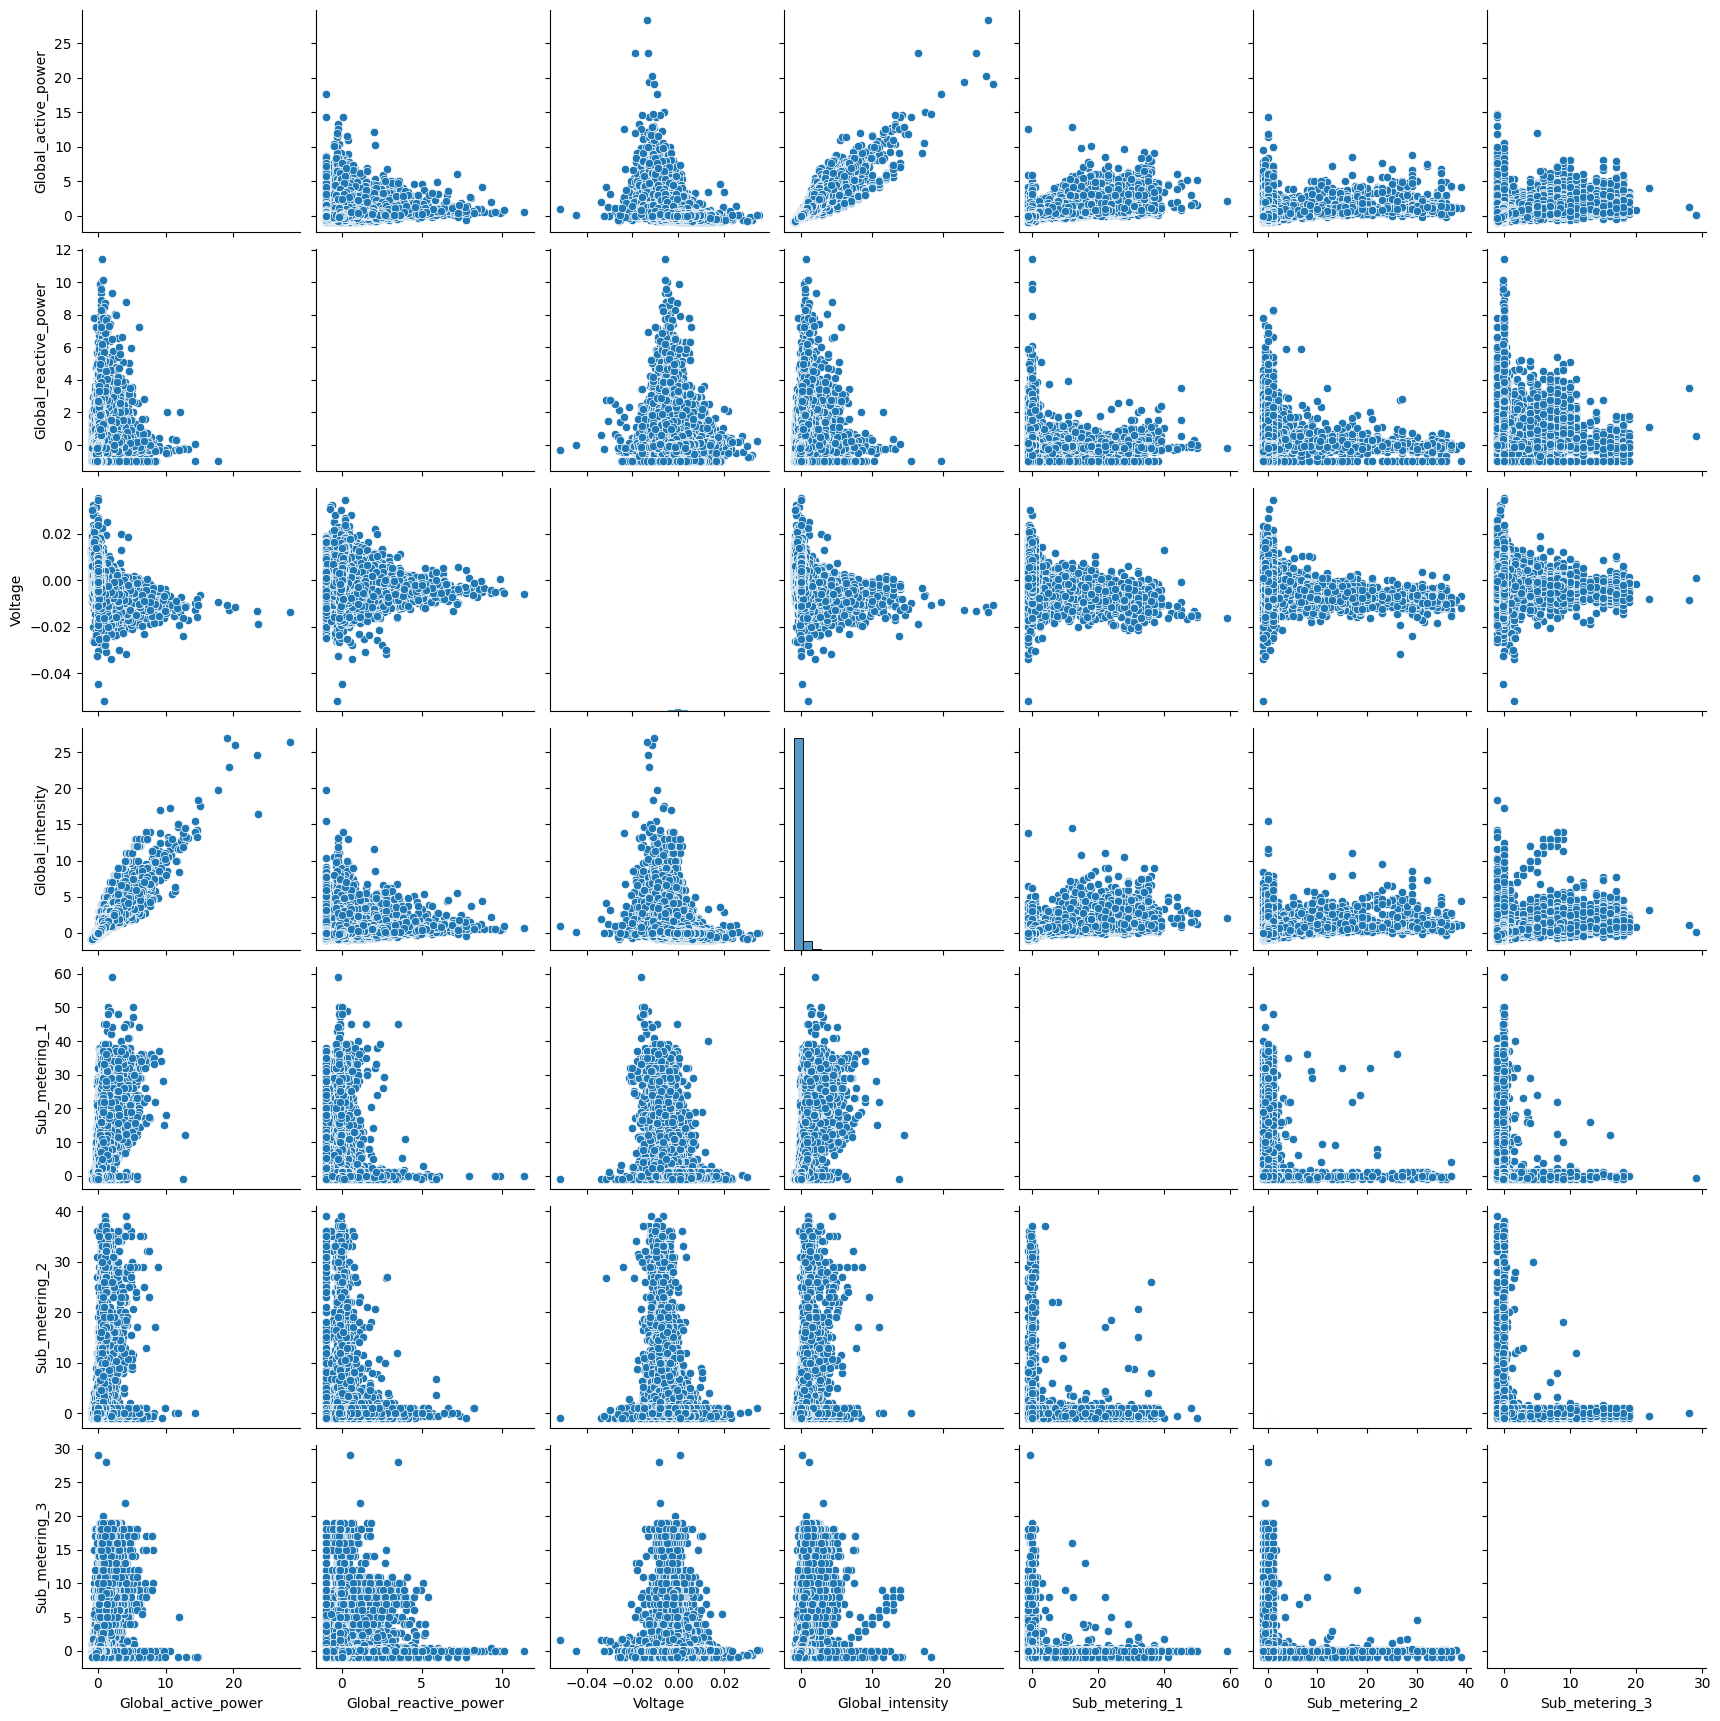

In [27]:
data_returns = data_df.pct_change()
sns.pairplot(data_returns)

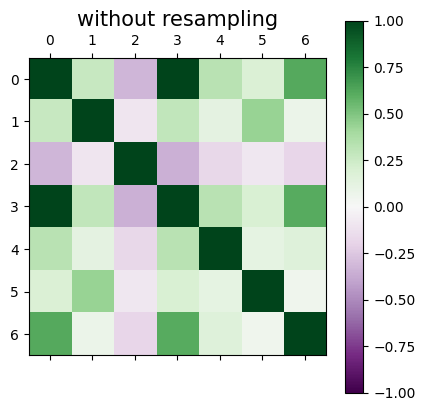

In [23]:
plt.matshow(data_df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_1083/2495057601.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.matshow(data_df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
/var/folders/xy/74x63lp17bn73vvbcrj1mk040000gn/T/ipykernel_1083/2495057601.py:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.matshow(data_df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')


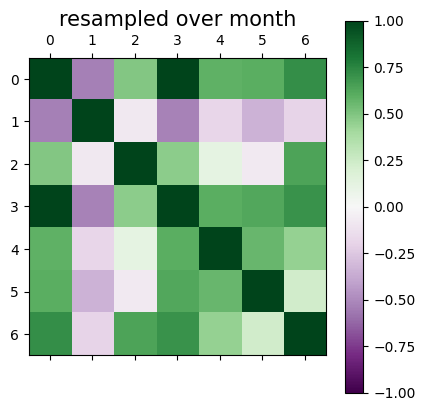

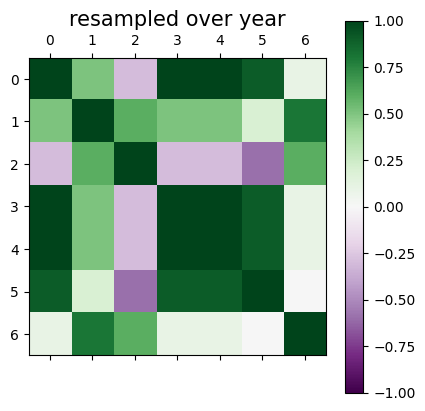

In [25]:
plt.matshow(data_df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(data_df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

### LSTM Data Preparation and Feature Engineering

In [31]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [7]:
### Resampling of data over hour
data_df_resample = data_df.resample('h').mean()
data_df_resample.shape

NameError: name 'data_df' is not defined

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
scaler.fit_transform(data_df_resample)

NameError: name 'data_df_resample' is not defined